__Сборный проект-1__
# Выявляем закономерности определяющие успешность продаж компьютерных игр. 

__Содержание проекта__

[Шаг 1: открываем данные и изучаем общую информацию](#step1)
- [Делаем промежуточный вывод](#step1_last)

[Шаг 2: подготавливаем данные и заменяем пропуски](#step2)
- [Приводим названия колонок к нижнему регистру](#step2_1)
- [Проверяем наличие дубликатов](#step2_2)
- [Проводим логическую проверку данных](#step2_3)
- [Пропуски. Игнорируем](#step2_4)
- [Делаем промежуточный вывод](#step2_last)

[Шаг 3: проведем исследовательский анализ](#step3)
- [Проведем предварительный анализ](#step3_1)
- [Оценим сколько игр выпускалось в разные годы](#step3_2)
- [Оценим как менялись продажи по платформам](#step3_3)
- [Выберем актуальный период](#step3_4)
- [Оценим лидирующие платформы](#step3_5)
- [Оценим разброс продаж по платформам с помощью ящика с усами](#step3_6)
- [Оценим влияние критиков и пользователей на продажи](#step3_7)
- [Оценим самые прибыльные жанры](#step3_8)
- [Делаем промежуточные выводы](#step3_last)

[Шаг 4: составим портрет пользователя каждого региона](#step4)
- [Оценим наиболее популярные платформы](#step4_1)
- [Посмотрим наиболее поплуярные жанры](#step4_2)
- [Есть ли зависимость между продажами и рейтингом ESRB](#step4_3)
- [Делаем промежуточные выводы](#step4_last)

[Шаг 5: проверим гипотезы](#step5)
- [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step5_1)
- [Средние пользовательские рейтинги жанров Action и Sports одинаковые](#step5_2)
- [Средние рейтинги критиков жанров Action и Sports одинаковые](#step5_3)
- [Делаем промежуточные выводы](#step5_last)

[Шаг 6: делаем общий вывод](#step6)

<a id='step1'></a>

### Шаг 1: открываем данные и изучаем общую информацию

In [1]:
#импортируем библиотеки для дальнейшей работы
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import math
import warnings

In [2]:
#импортируем вводные данные
data = pd.read_csv('/datasets/games.csv')

In [3]:
#просматриваем данные глазами
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
print("Количество пропусков в данных")
print()
for column in data.columns:
    print(column, (len(data) - len(data[data[column].isna() == False ]))) #вычитаем из общего количества строк не пустые строки

Количество пропусков в данных

Name 2
Platform 0
Year_of_Release 269
Genre 2
NA_sales 0
EU_sales 0
JP_sales 0
Other_sales 0
Critic_Score 8578
User_Score 6701
Rating 6766


In [5]:
#просмотрим правильно ли присвоены типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='step1_last'></a>

#### Вывод:
1. Перед нами представлены данные по 2016 год в разрезе по названию игры/платформе/году выпуска и коммерческим показателям успеха, такие как количество проданных экземпляров и рейтинг игроков и критиков.
1. В данных есть пропуски в частности по `Critic_Score`, `User_Score` и `Rating` - нужно будет оценить чем их заполнять. При этом пропуски в `Name`, `Year_of_Release` никак на анализ не повлияют, поэтому их просто игнорируем.
1. Мы также видим, что например `Year_of_Release` имеет тип данных float, хотя это integer - нужно их будет заменить. Собственно как и по рейтингу `User_Score`, который скорее float.
1. Все верхние регистры названий колонок разумно привести к нижнему регистру, чтобы избежать путаницы.
1. Необходимо будет также проверить наличие дубликатов в названии игр.
1. После чего можно будет по тем колонкам которые имеют числовое значение построить графики "ящик с усами", чтобы найти необычные явления/выбросы, хотя возможно это просто будут наиболее популярные игры.
1. На этом закончим предобработку данных и проведем исследовательский и статистический анализ, чтобы выявить, что оказывает наибольшее влияние на успешность игр и как спланировать рекламную кампанию.


<a id='step2'></a>

### Шаг 2: подготавливаем данные и заменяем пропуски

<a id='step2_1'></a>

__Приводим названия колонок к нижнему регистру__

In [6]:
column_names_lower = []
for column in data.columns:
    column_names_lower.append(column.lower())

data.columns = column_names_lower

<a id='step2_2'></a>

__Проверим наличие дубликатов__
___
Дубликаты не обнаружены.

In [7]:
data.duplicated().sum()

0

In [8]:
#проверим на повторяющиеся названия игр - очевидно что где-то есть игры для разных платформ
data['name'].value_counts()

Need for Speed: Most Wanted         12
Madden NFL 07                        9
LEGO Marvel Super Heroes             9
Ratatouille                          9
FIFA 14                              9
                                    ..
Momotarou Dentetsu 15                1
Pocket Pool                          1
Angelique Trois                      1
Yu-Gi-Oh! Destiny Board Traveler     1
Jonas                                1
Name: name, Length: 11559, dtype: int64

_Посмотрим на примере одной игры, что все относится просто к разным платформам и разным годам выпуска - нас это устраивает._

In [9]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


_Некорректные значения например "tbd" меняются на NaN, поскольку tbd это всего лишь значение заполняющее пропуск._

In [10]:
#меняем типы данных
data['year_of_release'] = data['year_of_release'].astype('Int64')
#здесь возникают "tbd"
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [11]:
#подсчитаем суммарное количество проданных копий по всем трем регионам
data['total_sales'] = (
                        data['na_sales'] +
                        data['eu_sales'] +
                        data['jp_sales'] +
                        data['other_sales']
                      )

<a id='step2_3'></a>

__Проведу коротку логическую проверку, что в данных нет странностей, например:__
- отрицательных продаж;
- оценок критиков и пользователей выходящих за рамки.

In [12]:
print("Данных с продажами ниже нуля по Северной Америке: {}".format(len(data.query('na_sales < 0'))))
print("Данных с продажами ниже нуля по Европе: {}".format(len(data.query('eu_sales < 0'))))
print("Данных с продажами ниже нуля по Японии: {}".format(len(data.query('jp_sales < 0'))))
print("Данных с продажами ниже нуля по другим регионам: {}".format(len(data.query('other_sales < 0'))))
print("Данных с нестандартными отзывами критиков: {}".format(len(data.query('critic_score < 0 | critic_score > 100'))))
print("Данных с нестандартными отзывами пользователей: {}".format(len(data.query('user_score < 0 | critic_score > 100'))))


Данных с продажами ниже нуля по Северной Америке: 0
Данных с продажами ниже нуля по Европе: 0
Данных с продажами ниже нуля по Японии: 0
Данных с продажами ниже нуля по другим регионам: 0
Данных с нестандартными отзывами критиков: 0
Данных с нестандартными отзывами пользователей: 0


<a id='step2_4'></a>

__Пропуски в значениях отзывов критиков и пользователей__
___
Проигнорируем их, из-за угрозы искажения данных стат-теста далее.

__Пропуски в рейтинговой системе ESRB__
___
Заменяем на значение "no_ESRB_rating"

In [13]:
data['rating'] = data['rating'].fillna("no_ESRB_rating")

<a id='step2_last'></a>

#### Вывод:
Мы подготовили данные к анализу, а именно:
- заменили названия столбцов на нижний регистр;
- проверили, что дубликатов в данных нет, а те, что есть относятся просто к мультиплатформенным играм;
- мы заменили `tbd` на nan, применив атрибут `coerce` в функции `to_numeric`. Поскольку `tbd` - это всего лишь обозначение замещающее пропуск в данных;
- пропуски мы проигнорировали для целей сохранения точности данных.

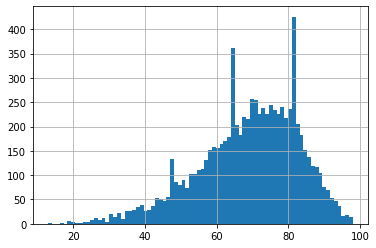

In [14]:
# код рвьювера
# после замены пропусков
data['critic_score'].hist(bins=80)

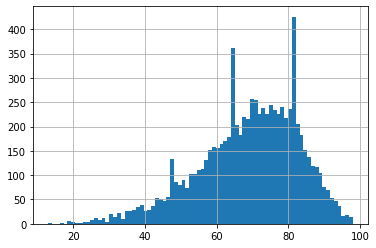

In [15]:
# код рвьювера
# до замены пропусков
data_1 = pd.read_csv('/datasets/games.csv')
data_1['Critic_Score'].hist(bins=80)

<a id='step3'></a>

### Шаг 3: проведите исследовательский анализ

<a id='step3_1'></a>

__Проведем предварительный анализ__
1. Как вообще менялось количество отзывов и игр по годам - ожидаемо что в 80х игр было мало и отзывов тоже;
1. Интересует есть ли зависимость между отзывом и например количеством проданных копий - ожидаемо, что чем больше продаж тем выше рейтинги.
1. Также полагаю, что есть зависимость между отзывами и жанрами игр.
___
Мы видим, что есть сильная разница между рейтингами в зависимости от жанра, количества проданных копий и года выпуска игры.

In [16]:
#создаем переменные, чтобы оценить зависимость между годом выпуска игры и оценками критиков
games = data.pivot_table(index = "year_of_release", values = "name", aggfunc='count')
users = data.pivot_table(index = "year_of_release", values = "user_score", aggfunc='count')
critics = data.pivot_table(index = "year_of_release", values = "critic_score", aggfunc='count')

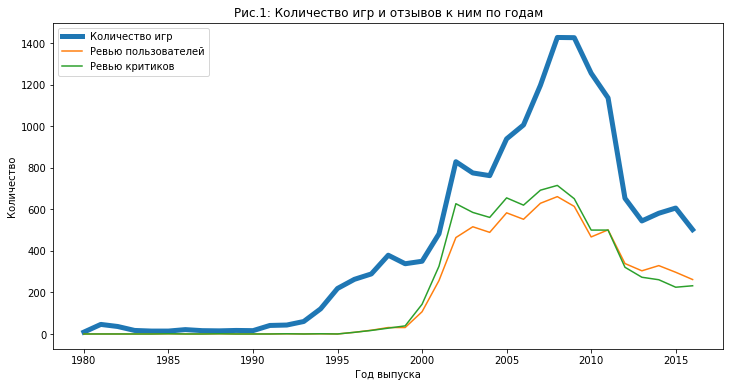

In [17]:
#рисуем график чтобы предварительно оценить как заполнять пропуски
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(games, label='Количество игр', linewidth = 5) 
ax.plot(users, label='Ревью пользователей')  
ax.plot(critics, label='Ревью критиков')  
ax.set_xlabel('Год выпуска') 
ax.set_ylabel('Количество')  
ax.set_title("Рис.1: Количество игр и отзывов к ним по годам") 
ax.legend()

Text(0, 0.5, 'Отзывы критиков, медиана')

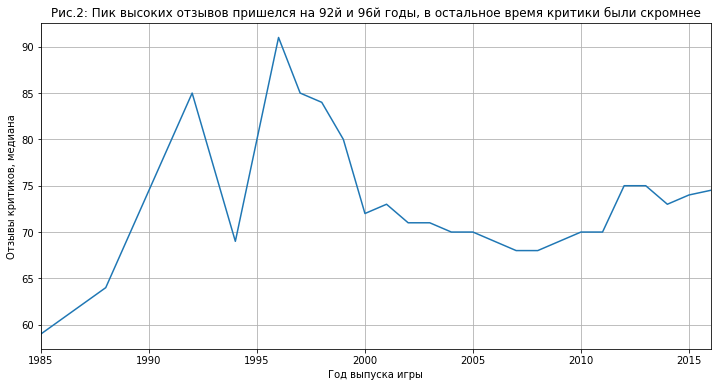

In [18]:
(data
    .pivot_table(index='year_of_release', values='critic_score', aggfunc='median')
    .plot(title='Рис.2: Пик высоких отзывов пришелся на 92й и 96й годы, в остальное время критики были скромнее', legend = False, grid=True, figsize = (12,6))
)
plt.xlabel('Год выпуска игры')
plt.ylabel('Отзывы критиков, медиана')

Text(0, 0.5, 'Продажи млн копий, максимум')

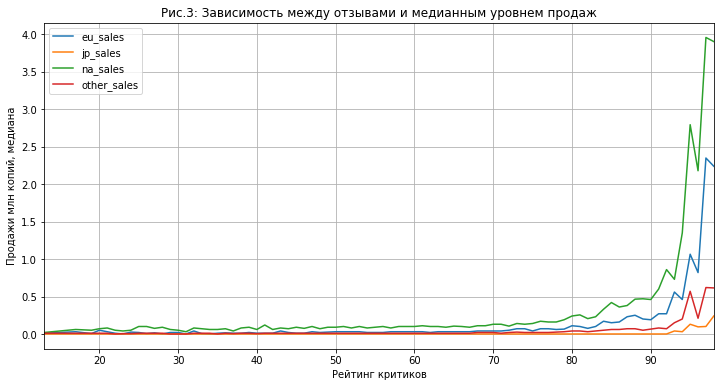

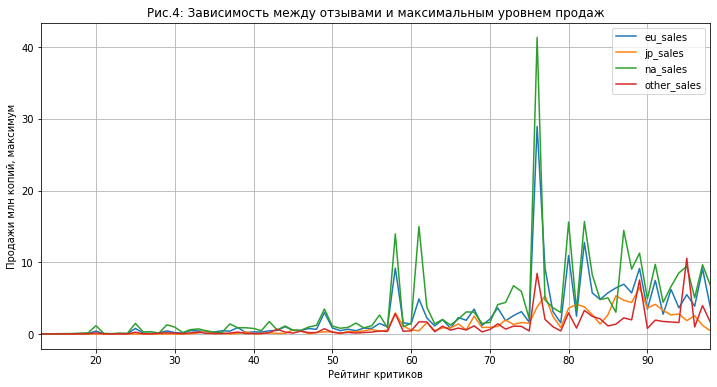

In [19]:
(data
    .pivot_table(index='critic_score', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc='median')
    .plot(title='Рис.3: Зависимость между отзывами и медианным уровнем продаж', legend = True, grid=True, figsize = (12,6))
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи млн копий, медиана')

(data
    .pivot_table(index='critic_score', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc='max')
    .plot(title='Рис.4: Зависимость между отзывами и максимальным уровнем продаж', legend = True, grid=True, figsize = (12,6))
)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи млн копий, максимум')

Text(0, 0.5, 'Отзывы критиков, медиана')

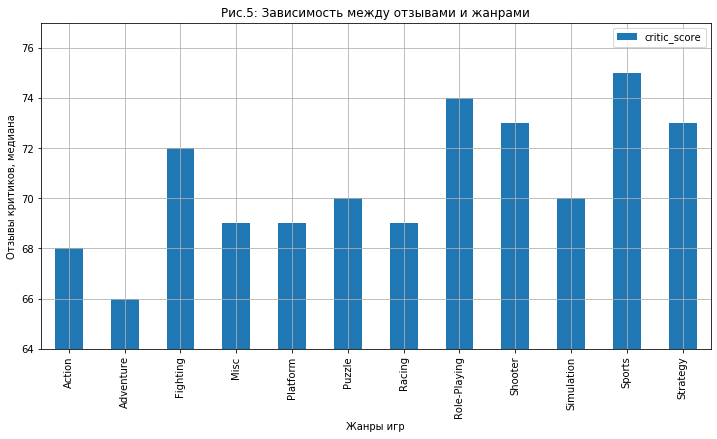

In [20]:
(data
    .pivot_table(index='genre', values='critic_score', aggfunc='median')
    .plot(title='Рис.5: Зависимость между отзывами и жанрами', legend = True, grid=True, figsize = (12,6), kind='bar', ylim=(64,77))
)
plt.xlabel('Жанры игр')
plt.ylabel('Отзывы критиков, медиана')

<a id='step3_2'></a>

__Посмотрим сколько игр выпускалось в разные годы.__
___
В первое десятилетие с 1980 по 1990 год, компьютерные игры были чем-то редким. В Рис.1 выше мы видели что отзывы оценки критиков и пользователей начали появляться только после 1990 года, а без этих данных установить успех/не успех игры сложно. Поэтому данными за первое десятилетие можно пренибречь однозначно. Однако нужно также учесть что с 1990го по 2016 год произойдет несколько смен популярных платформ, поэтому правильно будет для большей части анализа использовать например последние 2 года, т.е. 2015 и 2016 год.

Text(0, 0.5, 'Количество игр выпущено')

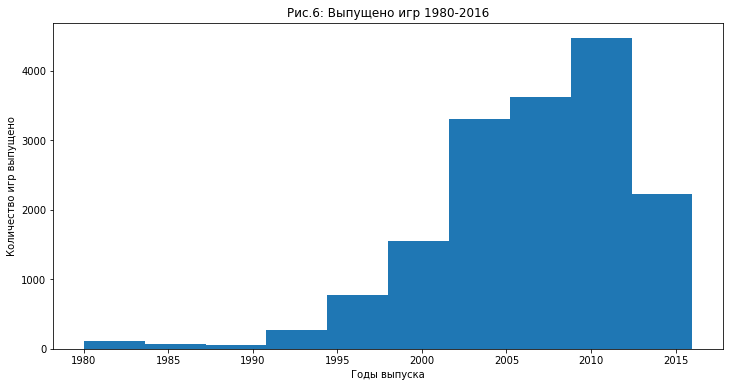

In [21]:
data['year_of_release'].plot(kind='hist', title='Рис.6: Выпущено игр 1980-2016', figsize = (12,6))
plt.xlabel('Годы выпуска')
plt.ylabel('Количество игр выпущено')

<a id='step3_3'></a>

__Построим распределение по платформам.__
___
Мы видим, что в целом жизненный цикл от рассвета, до заката популярности платформы занимает примерно 10 лет, если повезет, а у каких-то платформ, быстрее 10 лет, например GBA.


In [22]:
#сначала определим 10 самых популярных платформ за все время
platform_most_popular = data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(10)
platform_most_popular = platform_most_popular.reset_index(level='platform')
#теперь просто определим все виды платформ от устаревших до актуальных
platform_all = data.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)
platform_all = platform_all.reset_index(level='platform')


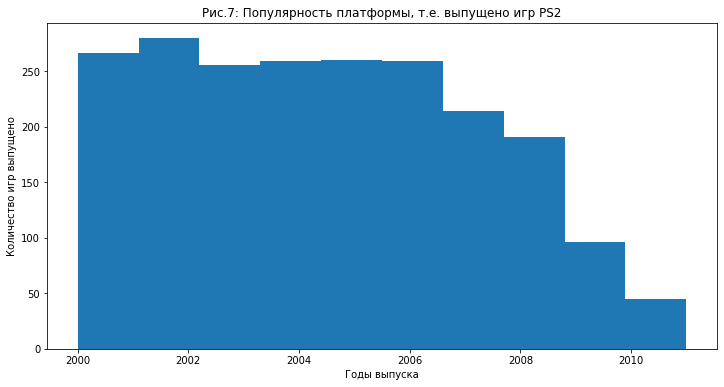

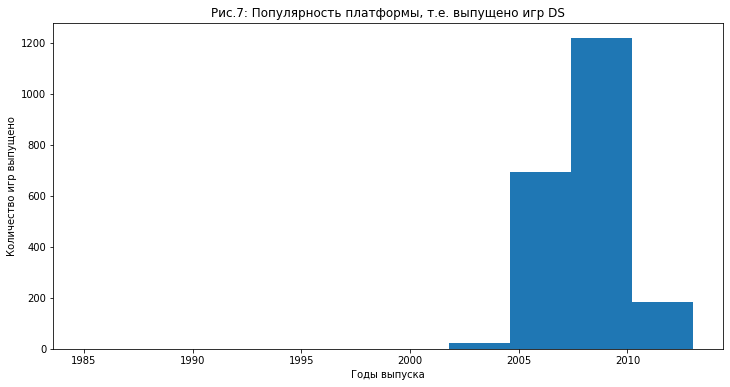

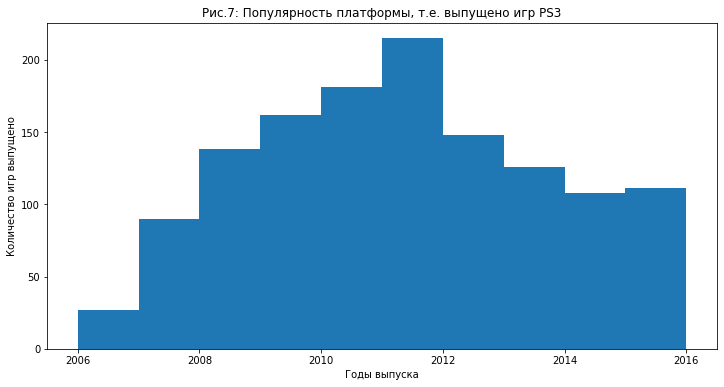

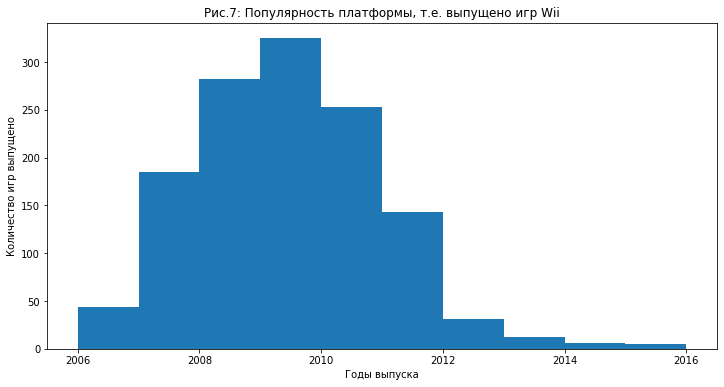

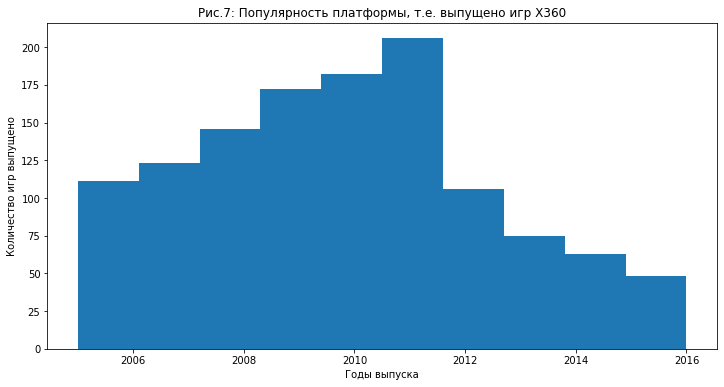

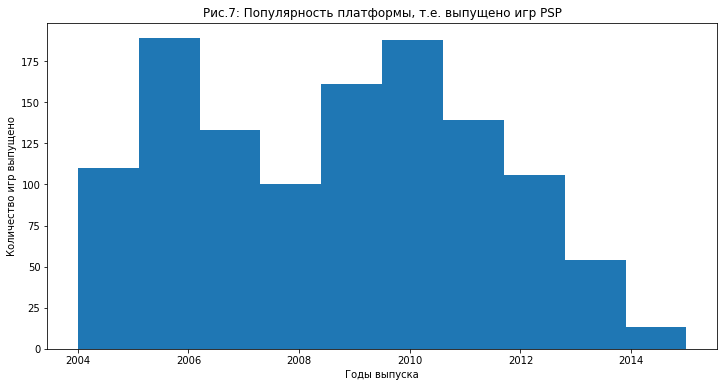

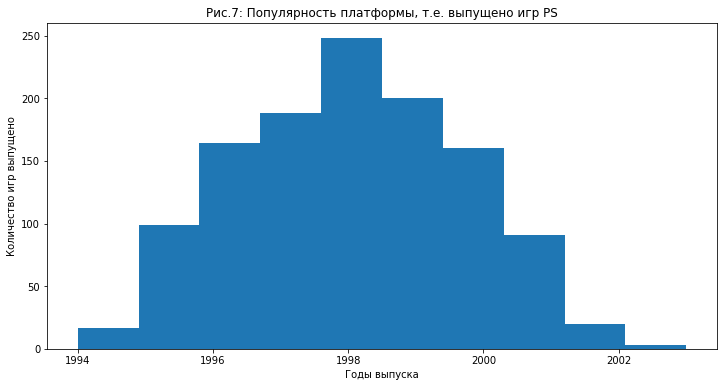

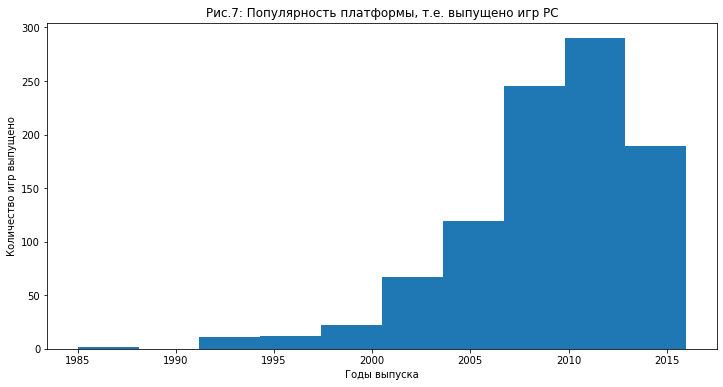

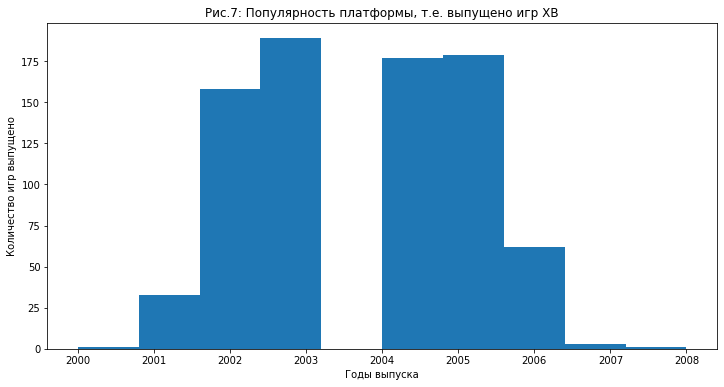

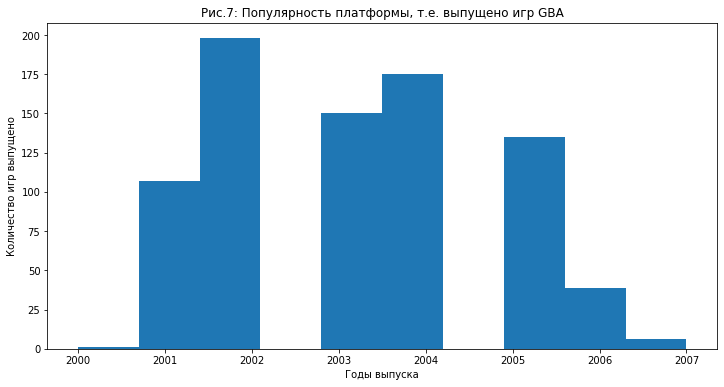

In [23]:
#а теперь выведем графики гистограммы по этим платформам
for plat in platform_most_popular['platform']:
    data_slice = data[data['platform'] == plat]
    data_slice['year_of_release'].plot(kind='hist', title=("Рис.7: Популярность платформы, т.е. выпущено игр " + plat) , figsize = (12,6))
    plt.xlabel('Годы выпуска')
    plt.ylabel('Количество игр выпущено')
    plt.show()

<a id='step3_4'></a>

__Возьмем только данные за актуальный период:__
1. данные за 1980-1990 далее не учитываем однозначно.
2. но фокусироваться все-таки будем на данных за 2015-2016 гг., чтобы учитывать самые актуальные платформы.

In [24]:
data_actual_period9016 = data[data['year_of_release'] >= 1990]
data_actual_period1516 = data[data['year_of_release'] >= 2015]

In [25]:
print("Отсеилось {} строк за 1980-2014 гг.".format(len(data)-len(data_actual_period1516)))

Отсеилось 15607 строк за 1980-2014 гг.


<a id='step3_5'></a>

__Оценим какие платформы лидируют по продажам.__
___
Из Рис.8 и Рис.9 ниже мы видим, что наиболее популярны за 2015-2016 год PS4 и XOne, но век платформ не долгий из тех что растут можно отметить:
- PS4
- XOne
- WiiU
- PC - скорее растут чем падают :)

Из тех что падают:
- PSV
- 3DS
- X360
- Wii
- PS3

Из тех что упали и уже вряд ли будут расти - все остальные.

In [26]:
#создадим список растущих платформ, чтобы к нему обращаться
platform_rising = ['PS4', 'XOne', 'WiiU', 'PC']
#создаим список из топ-5 наиболее популярных платформ за последние 2 года
platform_most_popular_5 = data_actual_period1516.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).head()
#и список наиболее популярных жанров за последние 2 года
genres_most_popular_5 = data_actual_period1516.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).head()

Text(0, 0.5, ' ')

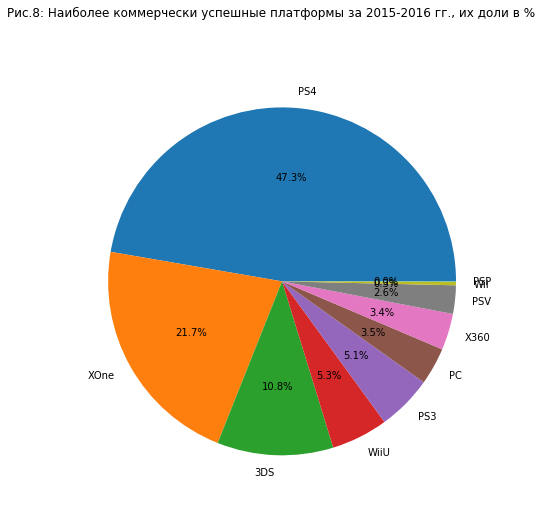

In [27]:
(data_actual_period1516
            .query('year_of_release >= 2015')
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values(by='total_sales', ascending=False)
            .plot(kind='pie', subplots=True, legend=False, figsize=(12,8), title='Рис.8: Наиболее коммерчески успешные платформы за 2015-2016 гг., их доли в %', autopct='%1.1f%%')
            )
plt.ylabel(' ')

Ошибка в чтении данных по платформе  2600


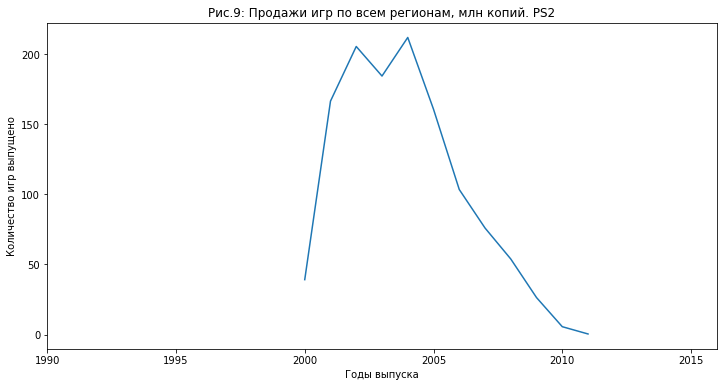

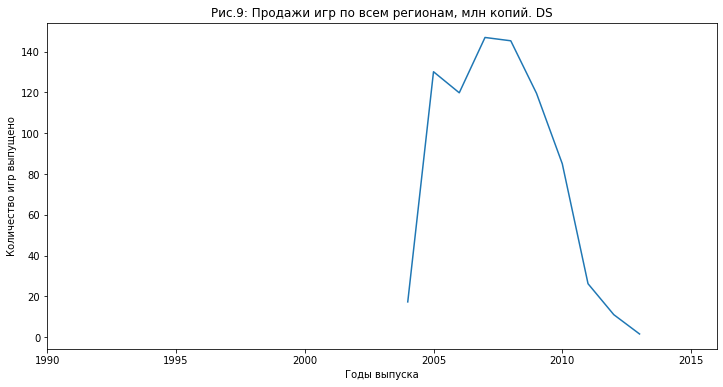

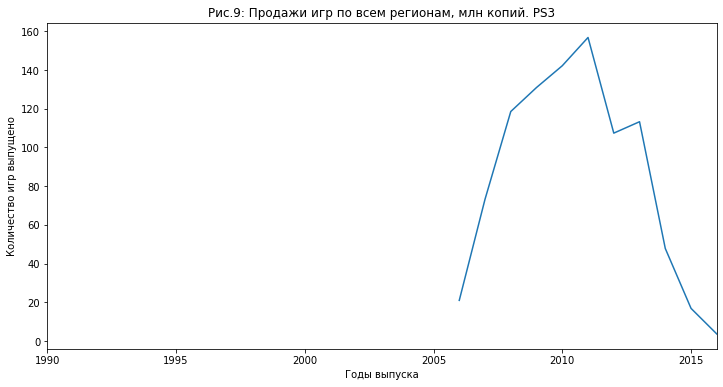

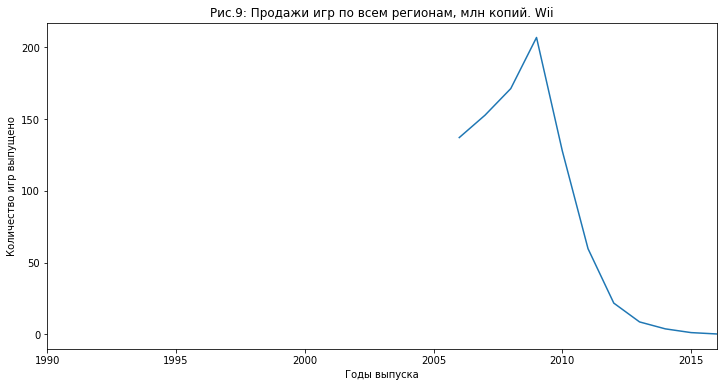

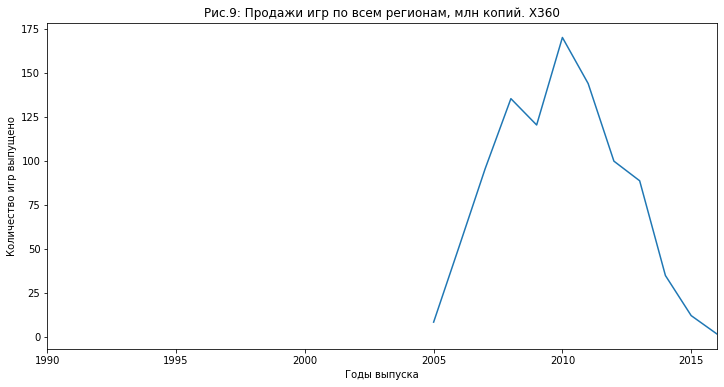

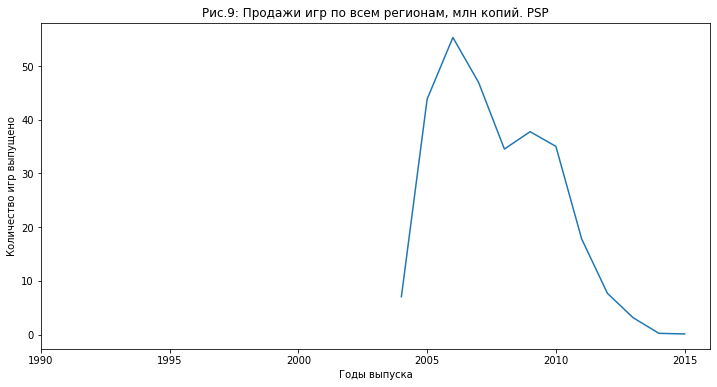

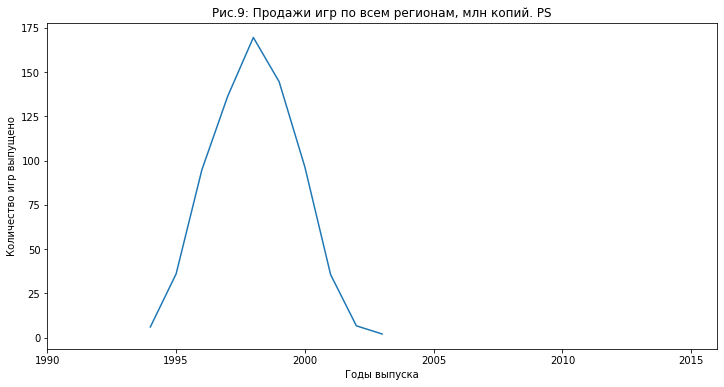

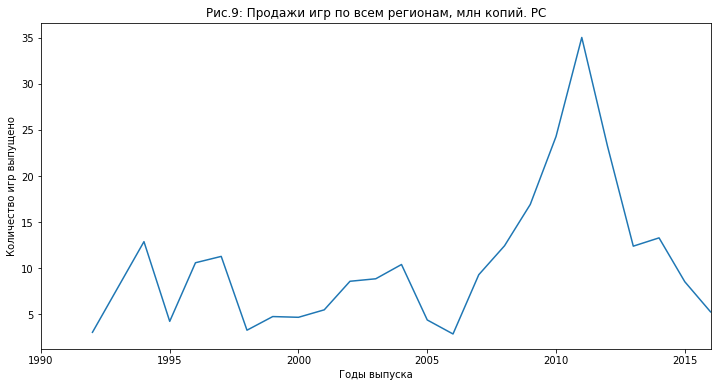

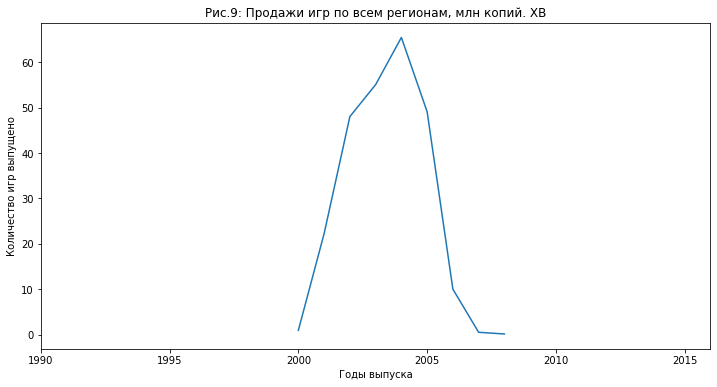

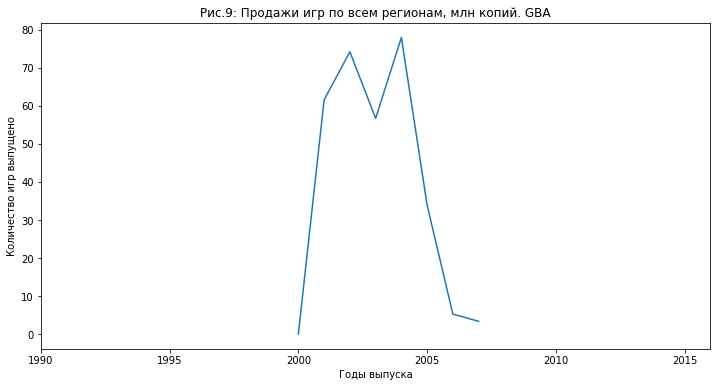

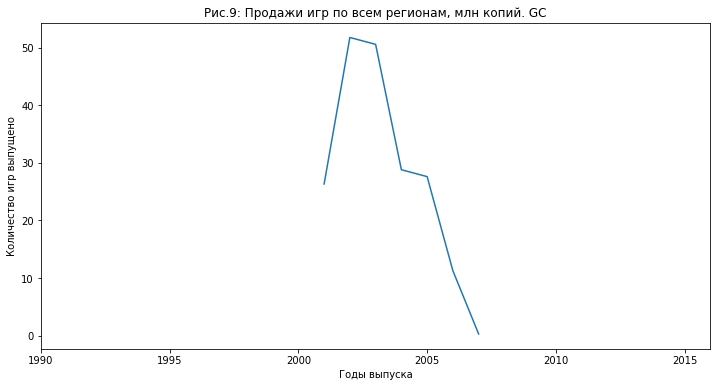

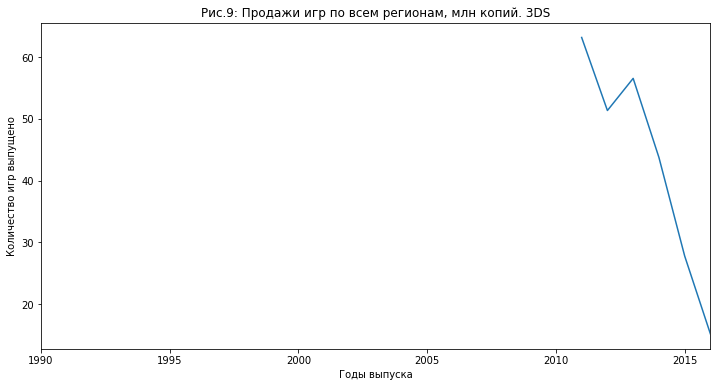

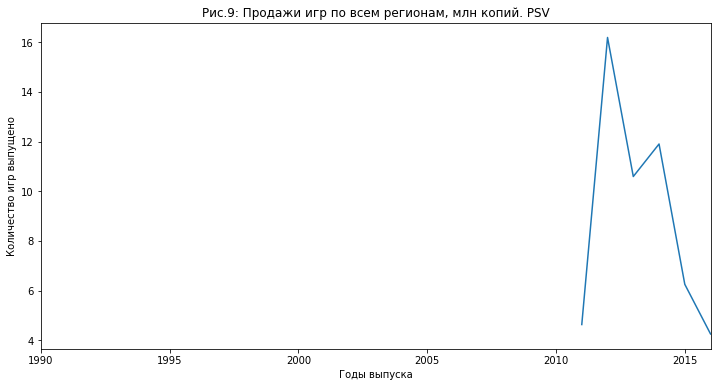

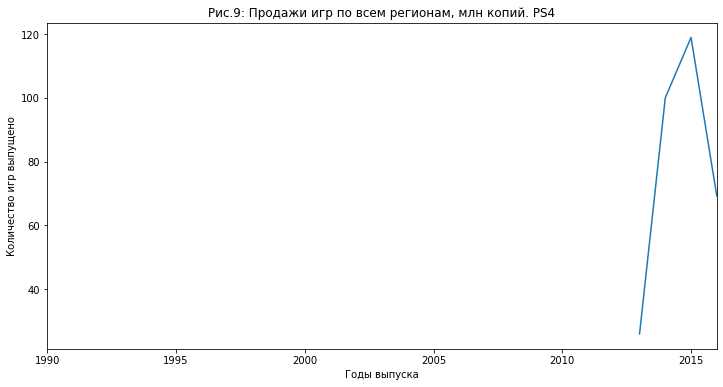

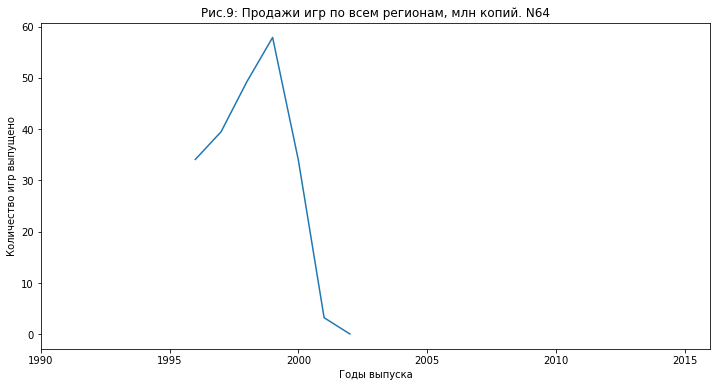

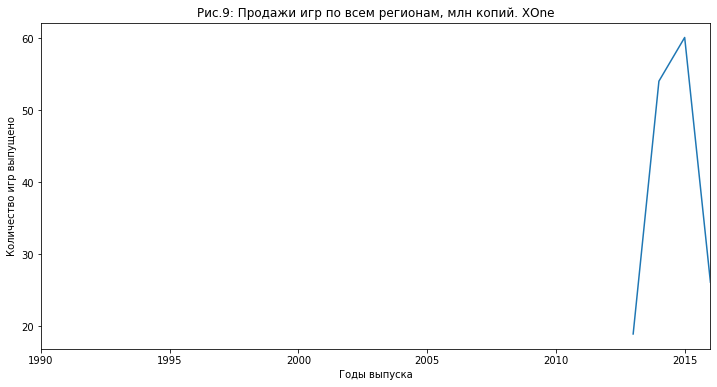

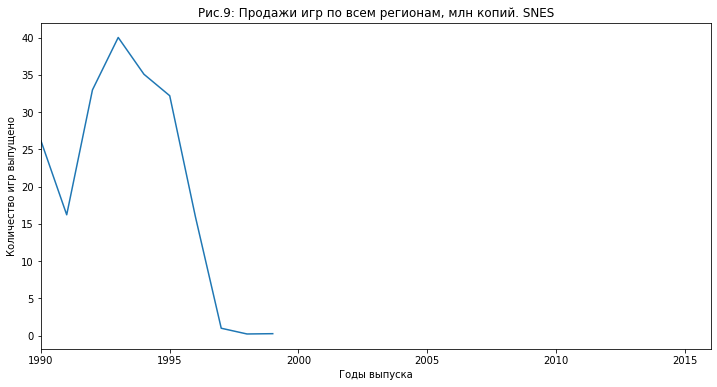

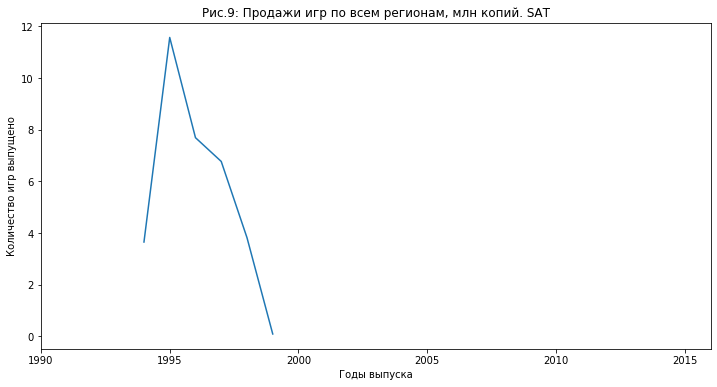

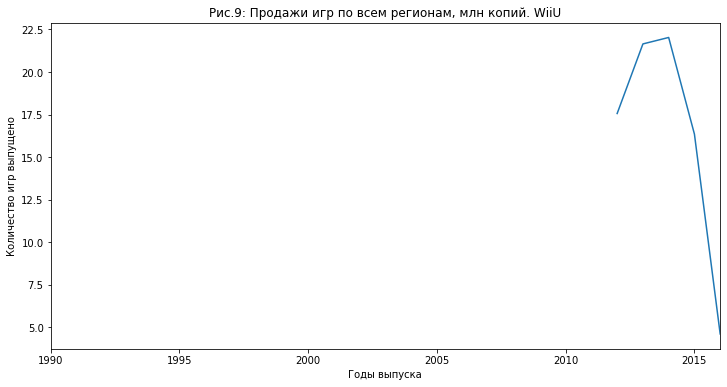

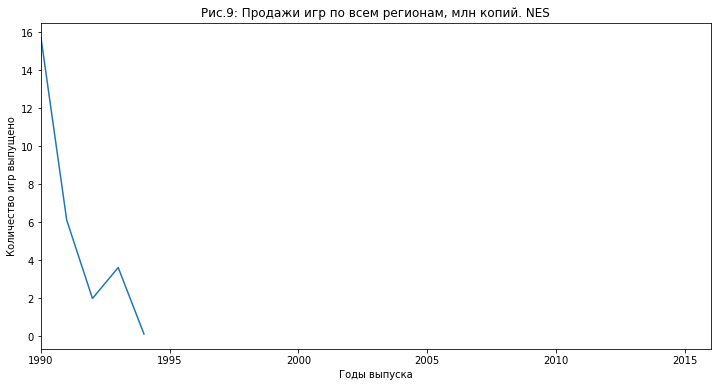

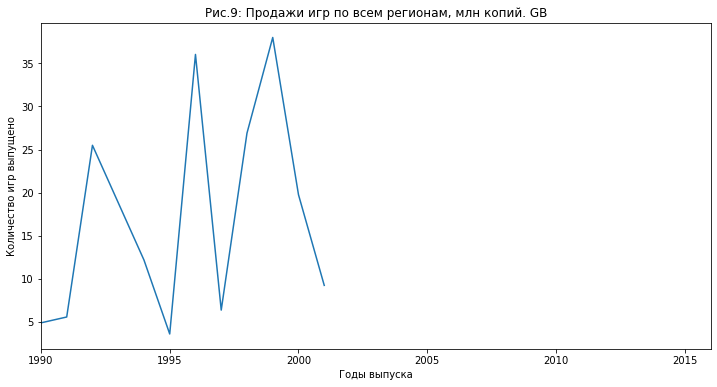

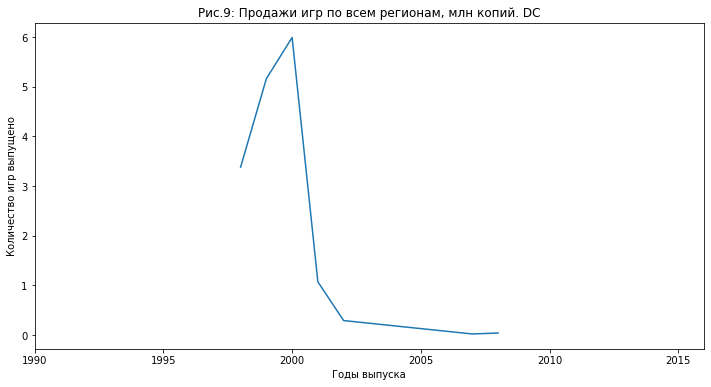

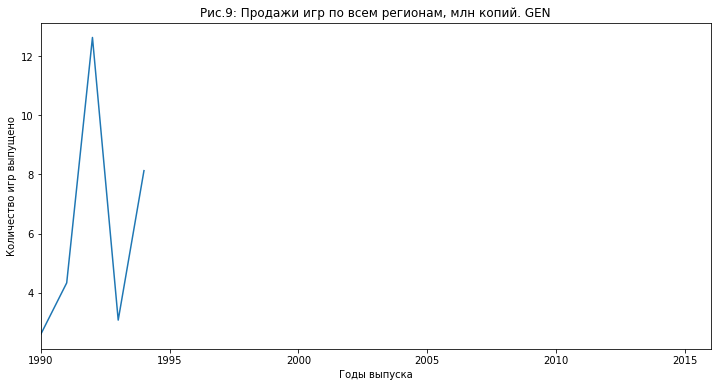

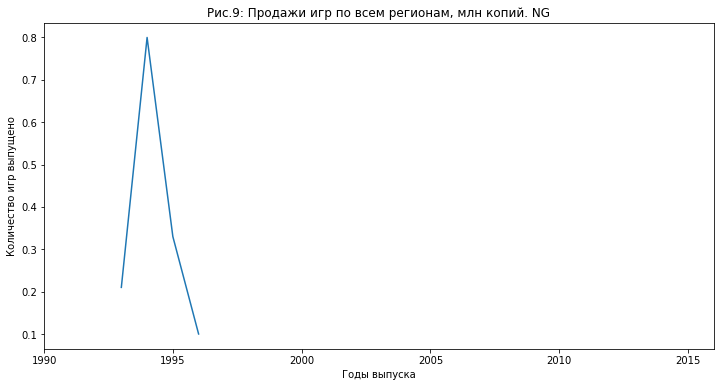

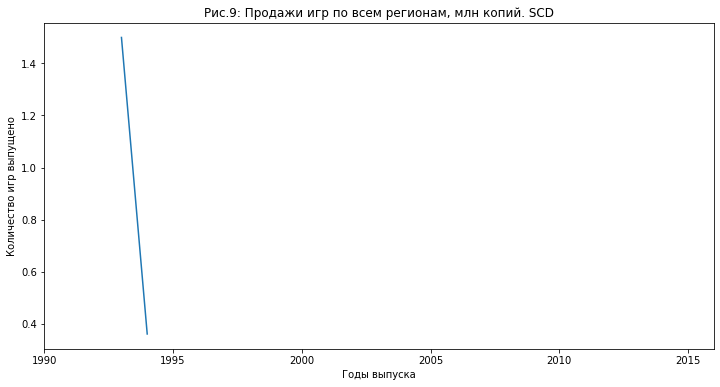

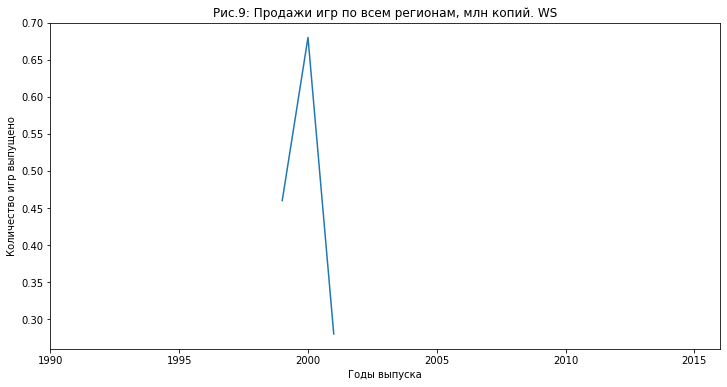

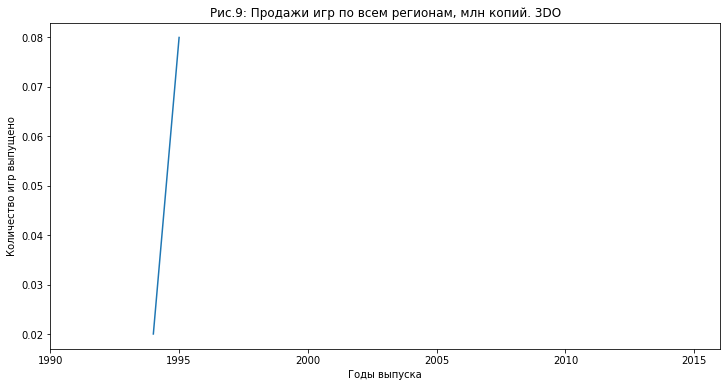

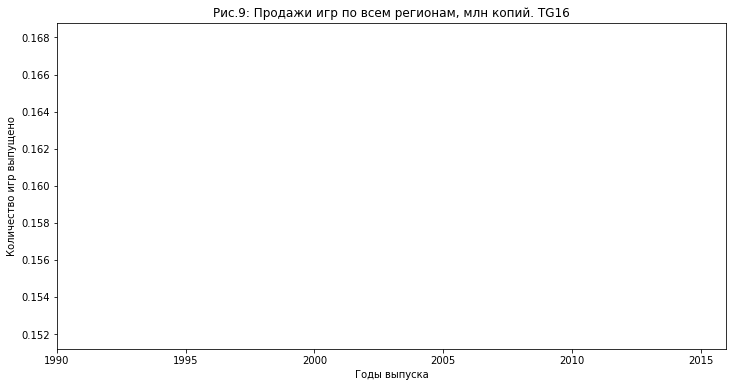

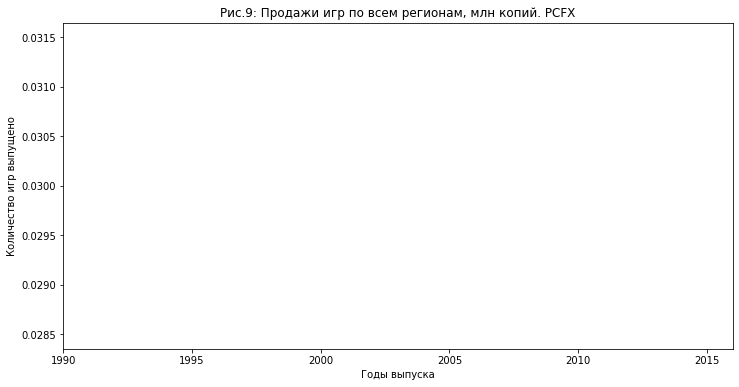

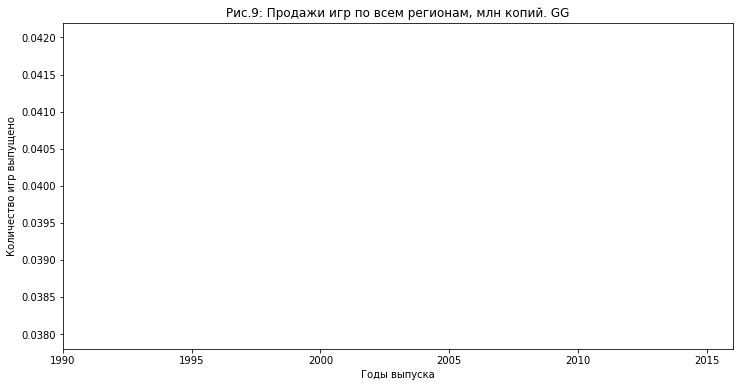

In [28]:
for plat in platform_all['platform']:
    try:
        data_slice = data_actual_period9016[data_actual_period9016['platform'] == plat]
        (data_slice
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')    
        .plot(title=("Рис.9: Продажи игр по всем регионам, млн копий. " + plat) , figsize = (12,6), legend=False, xlim = (1990,2016))
        )
        plt.xlabel('Годы выпуска')
        plt.ylabel('Количество игр выпущено')
    except:
         warnings.filterwarnings('ignore')
         print("Ошибка в чтении данных по платформе ", plat)
            
    

<a id='step3_6'></a>

__Графики "ящик с усами" по наиболее популярным платформам показывают, что абсолютное большинство игр укладывается в продажи до ~600 тысяч копий, например по `PS4` и по `XOne`, однако мы также можем заметить достаточно длинный "правый хвост" продаж, который говорит о том, что достаточно много отдельных игр блокбастеров, которые продаются существенно лучше.__
___

Далее постараемся отследить характерные черты именно этих блокбастеров, чтобы спланировать рекламную кампанию.
Под порогом блокбастера установим условную границу в `1 миллион проданных копий`

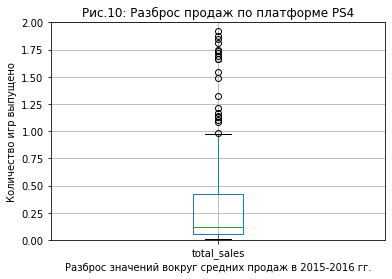

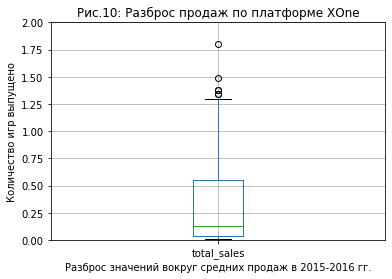

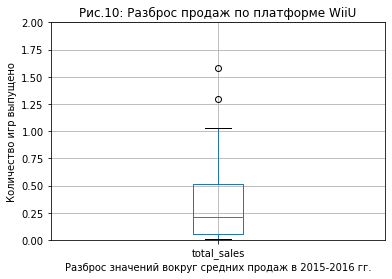

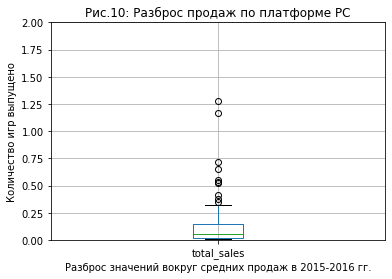

In [29]:
for plat in platform_rising:
    data_actual_period1516[data_actual_period1516['platform'] == plat].boxplot('total_sales')
    plt.ylim(0,2)
    plt.title('Рис.10: Разброс продаж по платформе ' + plat)
    plt.xlabel('Разброс значений вокруг средних продаж в 2015-2016 гг.')
    plt.ylabel('Количество игр выпущено')
    plt.show()

<a id='step3_7'></a>

__Оценим как влияют на продажи внутри одной популярной платформы (возьмем `PS4`, как самую большую) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.__
___
На рисунке 11 ниже мы видим, что в общем случае игры которые продаются тиражом более 1 млн копий имеют отзывы критиков от 70 баллов, при этом часто даже если игры имеют такую высокую оценку критиков большинство все равно не будут так хорошо продаваться.

На рисунке 12 мы видим, что отзывами пользователей все еще более не однозначно, но для такого чтобы игра была успешной отзыв пользователей должен быть не менее 6ти.

Отзывы критиков являются более надежной метрикой прогнозирования успешности продаж, хотя тоже далеко не идеальной.

In [30]:
#подсчитаем сколько было случаев для платформы `PS4`, когда продажи превысили 1 млн экземляров
print("Только {:.2%} игр на консоли PS4 преодолевают порог в 1 млн копий:".format(len(data_actual_period1516.query('platform == "PS4" and total_sales >= 1')) / len(data_actual_period1516.query('platform == "PS4"'))))
print("- из них с отзывами критиков более 70 баллов {:.2%}".format(len(data_actual_period1516.query('platform == "PS4" and total_sales >= 1 and critic_score >= 70')) / len(data_actual_period1516.query('platform == "PS4" and total_sales >= 1'))))
print("- из них с отзывами пользователей более 6 баллов {:.2%}".format(len(data_actual_period1516.query('platform == "PS4" and total_sales >= 1 and user_score >= 6')) / len(data_actual_period1516.query('platform == "PS4" and total_sales >= 1'))))

Только 14.29% игр на консоли PS4 преодолевают порог в 1 млн копий:
- из них с отзывами критиков более 70 баллов 74.42%
- из них с отзывами пользователей более 6 баллов 62.79%


Text(0, 0.5, 'Отзывы критиков')

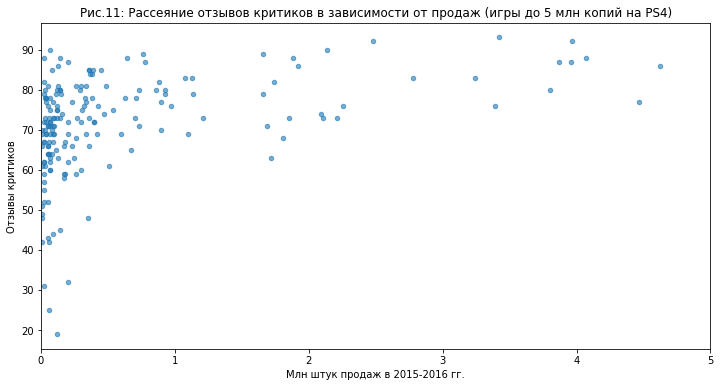

In [31]:
data_actual_period1516.query('platform == "PS4"').plot(x='total_sales', y='critic_score', kind='scatter', figsize = (12,6), title="Рис.11: Рассеяние отзывов критиков в зависимости от продаж (игры до 5 млн копий на PS4)", alpha = 0.6, xlim=(0,5))
plt.xlabel('Млн штук продаж в 2015-2016 гг.')
plt.ylabel('Отзывы критиков')

Text(0, 0.5, 'Отзывы пользователей')

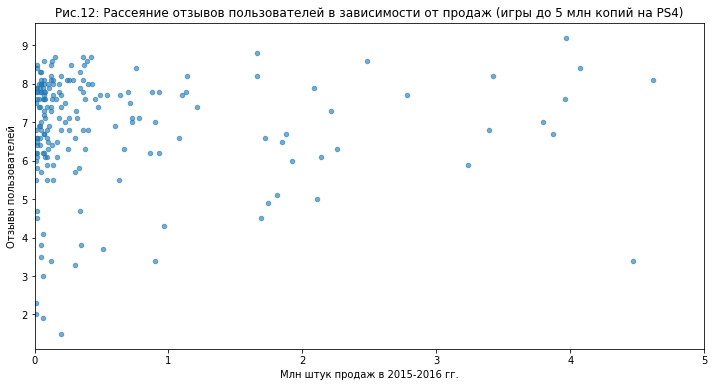

In [32]:
data_actual_period1516.query('platform == "PS4"').plot(x='total_sales', y='user_score', kind='scatter', figsize = (12,6), title="Рис.12: Рассеяние отзывов пользователей в зависимости от продаж (игры до 5 млн копий на PS4)", alpha = 0.6, xlim=(0,5))
plt.xlabel('Млн штук продаж в 2015-2016 гг.')
plt.ylabel('Отзывы пользователей')

__Подсчитаем корреляцию между продажами и отзывами критиков и пользователей.__

In [33]:
data_actual_period_PS4 = data_actual_period1516.query('platform == "PS4"')
data_actual_period_PS4_critic_score70 = data_actual_period1516.query('platform == "PS4" and critic_score >= 70')
data_actual_period_PS4_user_score6 = data_actual_period1516.query('platform == "PS4" and user_score >= 6')
print("Коэффициент корреляции между отзывами критиков и продажами состаляет - {:.2f}".format(data_actual_period_PS4['critic_score'].corr(data_actual_period_PS4['total_sales'])))
print("Но если мы возьмем только отзывы критиков с оценкой более 70, корреляция составит - {:.2f}".format(data_actual_period_PS4_critic_score70['critic_score'].corr(data_actual_period_PS4_critic_score70['total_sales'])))

Коэффициент корреляции между отзывами критиков и продажами состаляет - 0.39
Но если мы возьмем только отзывы критиков с оценкой более 70, корреляция составит - 0.41


In [34]:
print("Коэффициент корреляции между отзывами пользователей и продажами состаляет - {:.2f}".format(data_actual_period_PS4['user_score'].corr(data_actual_period_PS4['total_sales'])))
print("Но если мы возьмем только отзывы пользователей с оценкой более 6, корреляция составит - {:.2f}".format(data_actual_period_PS4_user_score6['user_score'].corr(data_actual_period_PS4_user_score6['total_sales'])))

Коэффициент корреляции между отзывами пользователей и продажами состаляет - -0.06
Но если мы возьмем только отзывы пользователей с оценкой более 6, корреляция составит - 0.03


__Теперь рассмотрим аналогичные данные взаимосвязи продаж и отзывов критиков по 3м другим популярным платформам `XOne`, `WiiU` и `PC`.__
___
На рисунке 13 ниже мы видим, что игры, которые преодалевают порог в 1 млн проданных копий имеют отзывы критиков более 75, что в целом схоже с нашим выводом выше по `PS4`.

In [35]:
XOne = data_actual_period1516.query('platform == "XOne"')
WiiU = data_actual_period1516.query('platform == "WiiU"')
PC = data_actual_period1516.query('platform == "PC"')


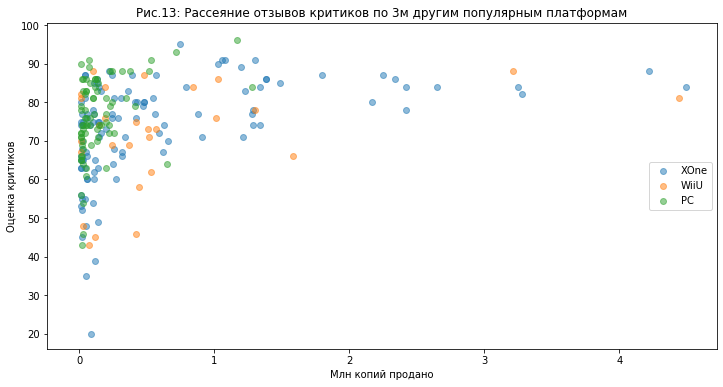

In [36]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x = XOne['total_sales'], y= XOne['critic_score'], label='XOne', alpha = 0.5) 
ax.scatter(x = WiiU['total_sales'], y= WiiU['critic_score'], label='WiiU', alpha = 0.5)  
ax.scatter(x = PC['total_sales'], y= PC['critic_score'], label='PC', alpha = 0.5)  
ax.set_xlabel('Млн копий продано') 
ax.set_ylabel('Оценка критиков')  
ax.set_title("Рис.13: Рассеяние отзывов критиков по 3м другим популярным платформам") 
ax.legend(loc = 'right')

<a id='step3_8'></a>

__Посмотрим на общее распределение игр по жанрам. Оценим самые прибыльные жанры и жанры с низкими продажами.__
___
Среди жанров с высокими медианными продажами выделяются топ-5:
- `platform` - видимо это игры созданные исключительно под какую-то конкретную платформу
- `shooter`
- `sports`
- `simulation`
- `role-playing`

Среди жанров с наибольшими продажами в целом начиная с 2015 года топ-5:
- `action`
- `sports` - при этом в именно в этом жанре наблюдаются игры с максимальной выручкой
- `shooter`
- `role-play`
- `misc` - видимо от английского miscellaneous (т.е. все остальные вместе взятые)

Ну а самые не популярные жанры - это:
- `puzzle`
- `strategy`
- `adventure`

_Будем этих трех избегать, а сфокусироваться стоит на пересечении топ-5 по медиане и по сумме, т.е. `shooter`, `sports`, `action`._

Text(0, 0.5, 'Млн штук продаж, медиана')

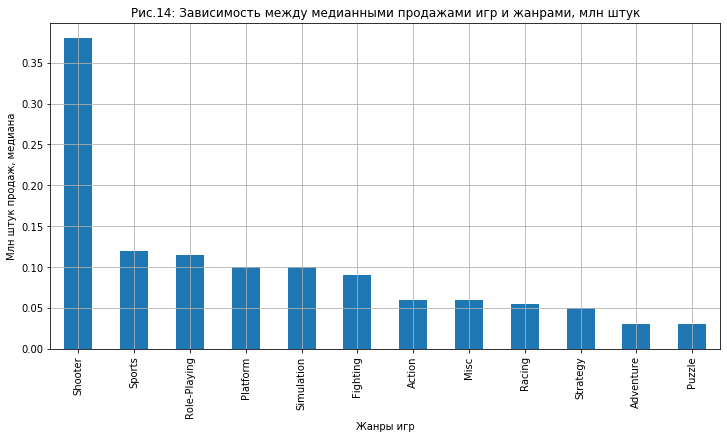

In [37]:
(data_actual_period1516
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .plot(title='Рис.14: Зависимость между медианными продажами игр и жанрами, млн штук', legend = False, grid=True, figsize = (12,6), kind='bar')
)
plt.xlabel('Жанры игр')
plt.ylabel('Млн штук продаж, медиана')

Text(0, 0.5, 'Млн штук продаж')

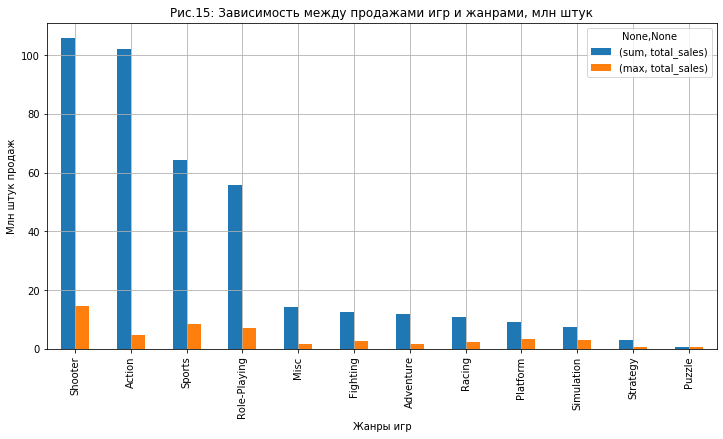

In [38]:
(data_actual_period1516
    .pivot_table(index='genre', values='total_sales', aggfunc=['sum','max'])
    .sort_values(by=('sum','total_sales'), ascending=False)
    .plot(title='Рис.15: Зависимость между продажами игр и жанрами, млн штук', legend = True, grid=True, figsize = (12,6), kind='bar')
)
plt.xlabel('Жанры игр')
plt.ylabel('Млн штук продаж')

<a id='step3_last'></a>

#### Вывод:
1. Мы показали, что данные за 1980-1990 не представляют для данного анализа особой ценности - поскольку там не было еще такого количества игр и отзывов по ним. Поэтому этот период был исключен из дальнейшего анализа. Но сфокусировали дальнейший анализ мы только на последних двух годах 2015-2016, чтобы учитывать текущие тренды.
1. Мы также увидели, что срок жизни консоли составляет до 10 лет.
1. Затем выделили топ-10 самых успешных консолей по количеству проданных игр, топ-растущих консолей и топ-5 платформ за последние 2 года (взяли 2 года как данные представляющие ценность, поскольку могут содержать тренд).
1. Мы постороили графики "ящик с усами", которые показали нам, что по ключевым платформам почти все продажи укладываются в ~600 тысяч штук проданных экземлпяров и установили порог для определения игр "блокбастеров" если они превзошли продажи 1 млн копий.
1. Мы построили графики рассеяния и подсчитали корреляцию между отзывами критиков/пользователей и данными продаж по платформе PS4. По итогу отзывы критиков несут большую способность прогнозировать продажи нежели отзывы пользователей. Коэффициент корреляции между отзывами критиков и продажами повышается если мы берем игры с оценкой более 70. Наши выводы в целом подтверждаются и на других платформах.
1. В конце мы оценили зависимость между жанрами игр и показателями продаж. Самыми многообещающими жанрами оказались `shooter`, `sports`, `action`.



<a id='step4'></a>

### Шаг 4: составим портрет пользователя каждого региона

<a id='step4_1'></a>

__Наиболее популярные платформы отличаются по регионам (Рис. 16).__
- `PS4` наиболее популярная платформа в Северной Америке и Европе - с долей 49% и 65% соответственно, в то время как в Японии всего 24%
- `3DS` самая популярная платфома Японии с долей в 48%, в то время как в Северной Америки и Европе всего 8% и 6% соответственно.

___
Соблюдается такой рейтинг (ранг).

In [39]:
print("Ранг платформ по регионам")
(data_actual_period1516
            .query('platform in @ platform_most_popular_5.index')
            .pivot_table(index='platform', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
            .rank(ascending = False)
)

Ранг платформ по регионам


,eu_sales,jp_sales,na_sales
platform,,,
PS4,1.0,2.0,1.0
XOne,2.0,5.0,2.0
3DS,3.0,1.0,3.0
PS3,4.0,4.0,4.0
PSV,5.0,3.0,5.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f946f4adbd0>,
      dtype=object)

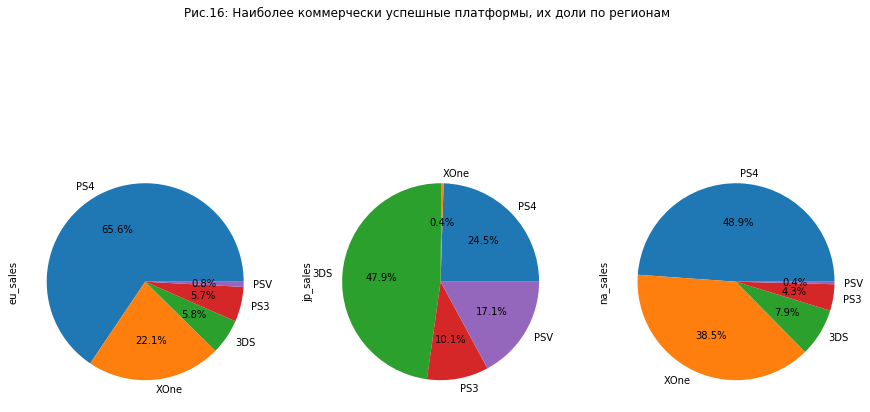

In [40]:
(data_actual_period1516
            .query('platform in @ platform_most_popular_5.index')
            .pivot_table(index='platform', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
            .plot(kind='pie', subplots=True, legend=False, figsize=(15,8), title='Рис.16: Наиболее коммерчески успешные платформы, их доли по регионам', autopct='%1.1f%%')
            )

<a id='step4_2'></a>

__Наиболее популярные жанры также отличаются по регионам (Рис. 17).__
- в Северной Америке и Европе наиболее популярны игры в жанре `Shooter`: 36% и 32% соответственно, а в Японии на этот жанр приходится всего 9%
- в Японии при этом 52% продаж приходятся на жанр `Action`, а в Северной Америке и Европе 26% и 28% соответственно.

In [41]:
print("Ранг жанров по регионам")
(data_actual_period1516
            .query('genre in @ genres_most_popular_5.index')
            .pivot_table(index='genre', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
            .rank(ascending = False)
)

Ранг жанров по регионам


,eu_sales,jp_sales,na_sales
genre,,,
Shooter,1.0,3.0,1.0
Action,2.0,1.0,2.0
Sports,3.0,5.0,3.0
Role-Playing,4.0,2.0,4.0
Adventure,5.0,4.0,5.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f946f0e5290>,
      dtype=object)

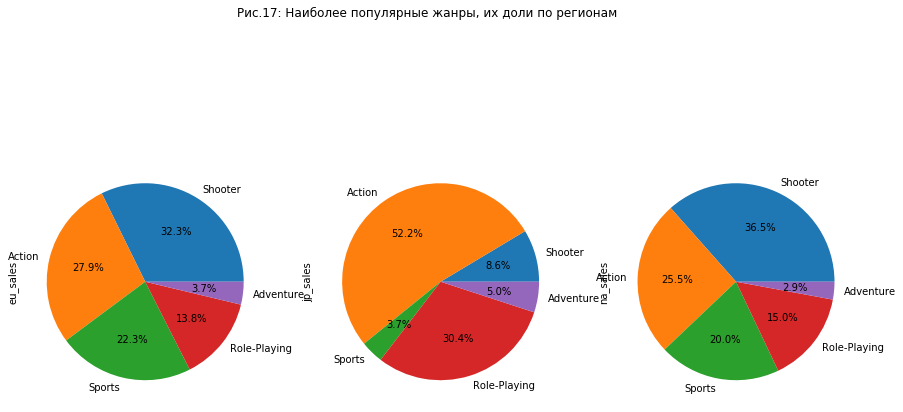

In [42]:
(data_actual_period1516
            .query('genre in @ genres_most_popular_5.index')
            .pivot_table(index='genre', values=['na_sales','jp_sales', 'eu_sales'], aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
            .plot(kind='pie', subplots=True, legend=False, figsize=(15,8), title='Рис.17: Наиболее популярные жанры, их доли по регионам', autopct='%1.1f%%')
            )

<a id='step4_3'></a>

__Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.__
___
На рисунках 18 и 19 ниже мы видим, что те игры которые демонстрируют максимальные продажи во всех регионах имеют рейтинг `E`, `M`, `T`, `E10` - если мы ориентируемся на блокбастер, то стоит обратить внимание прежде всего на игры с этими рейтингами. Если мы обращаем внимание на другие игры, то мы скорее целимся в игры со средней отдачей.

Text(0, 0.5, 'Млн штук продаж')

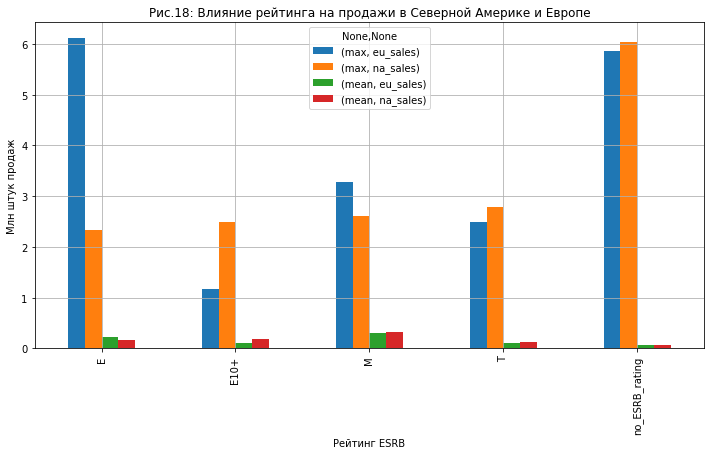

In [43]:
(data_actual_period1516
    .pivot_table(index='rating', values=['na_sales','eu_sales'], aggfunc=['max','mean'])
    .plot(title='Рис.18: Влияние рейтинга на продажи в Северной Америке и Европе', legend = True, grid=True, figsize = (12,6), kind='bar')
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Млн штук продаж')

Text(0, 0.5, 'Млн штук продаж')

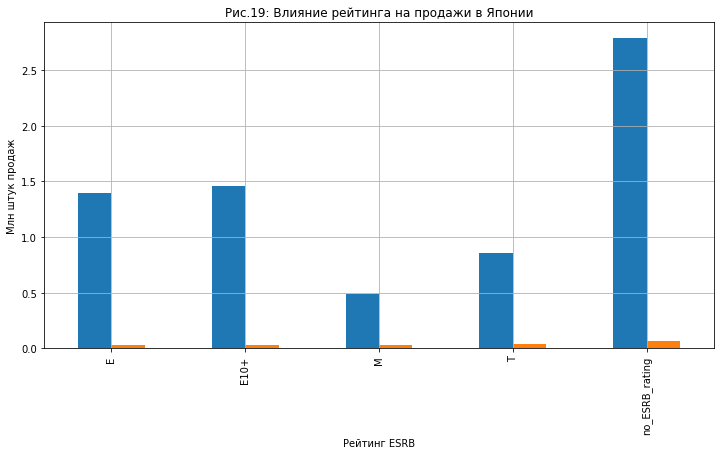

In [44]:
(data_actual_period1516
    .pivot_table(index='rating', values='jp_sales', aggfunc=['max','mean'])
    .plot(title='Рис.19: Влияние рейтинга на продажи в Японии', legend = False, grid=True, figsize = (12,6), kind='bar')
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Млн штук продаж')

<a id='step4_last'></a>

#### Вывод:
1. Портрет пользователя сильно отличается по ключевым регионам особенно между Японией с одной стороны и Европой/Северной Америкой с другой стороны. В Японии популярнее устаревающая `3DS`, а в Европе/Америке `PS4`.
1. Опять же в жанрах тоже есть различия. В Японии популярнее `Action`, а в Европе/Америке `Shooter`.
1. Рейтинг успешных игр отличается в Японии и Европе/Америке. В Северной Америке и Европе фокусироваться стоит на рейтингах в последовательности: `E`, `M`, `T`, `E10` - если мы ориентируемся на блокбастер. Если мы обращаем внимание на другие рейтинги, то мы скорее целимся в игры со средней отдачей. Однако в Северной Америке, Европе и особенно в Японии есть огромный пласт игр совершенно без рейтинговой оценки ESRB, которые тем не мнее являются локальными блокбастерами.

<a id='step5'></a>

### Шаг 5: проверим гипотезы

<a id='step5_1'></a>

__Средние пользовательские рейтинги платформ XOne и PC одинаковые__

Сформулируем гипотезы так:
- H0: Ср.рейтинги_пользователей_XOne = Ср.рейтинги_пользователей_PC
- H1: Ср.рейтинги_пользователей_XOne != Ср.рейтинги_пользователей_PC

Используем "гипотезу о равенстве средних двух генеральных совокупностей" и положим, что вариации совокупностей различаются.

Определим уровень статистической значимости `alpha = 0.05`

In [45]:
alpha = .05

In [46]:
#подсчитаем вариации, чтобы убедиться в их различии
XOne_user_rating = data_actual_period1516.query('platform == "XOne" and user_score.isna()==False')
PC_user_rating = data_actual_period1516.query('platform == "PC" and user_score.isna()==False')
print("Дисперсия оценок пользователей по платфоме Xbox One: {:.2f}".format(XOne_user_rating['user_score'].var()))
print("Дисперсия оценок пользователей по платфоме PC: {:.2f}".format(PC_user_rating['user_score'].var()))

Дисперсия оценок пользователей по платфоме Xbox One: 2.13
Дисперсия оценок пользователей по платфоме PC: 3.11


In [47]:
results_hyp_1 = st.ttest_ind(XOne_user_rating['user_score'], PC_user_rating['user_score'], equal_var = False)

In [48]:
print("p-значение: ", results_hyp_1.pvalue)
if results_hyp_1.pvalue < alpha:
    print("Отверграем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  0.2946308864003345
Не можем отвергнуть нулевую гипотезу


<a id='step5_2'></a>

__Средние пользовательские рейтинги жанров Action и Sports отличаются__

Сформулируем гипотезы так:
- H0: Ср.рейтинги_пользователей_Action = Ср.рейтинги_пользователей_Sports
- H1: Ср.рейтинги_пользователей_Action != Ср.рейтинги_пользователей_Sports

Используем "гипотезу о равенстве средних двух генеральных совокупностей" и положим, что вариации совокупностей различаются.

In [49]:
#подсчитаем вариации, чтобы убедиться в их различии
Action_user_rating = data_actual_period1516.query('genre == "Action" and user_score.isna()==False')
Sports_user_rating = data_actual_period1516.query('genre == "Sports" and user_score.isna()==False')
print("Дисперсия оценок пользователей по жанру Action: {:.2f}".format(Action_user_rating['user_score'].var()))
print("Дисперсия оценок пользователей по жанру Sports: {:.2f}".format(Sports_user_rating['user_score'].var()))

Дисперсия оценок пользователей по жанру Action: 1.81
Дисперсия оценок пользователей по жанру Sports: 3.87


In [50]:
results_hyp_2 = st.ttest_ind(Action_user_rating['user_score'], Sports_user_rating['user_score'], equal_var = False)

In [51]:
print("p-значение: ", results_hyp_2.pvalue)
if results_hyp_2.pvalue < alpha:
    print("Отверграем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  5.97163549920592e-10
Отверграем нулевую гипотезу


<a id='step5_3'></a>

__Проверим также эту гипотезу, но уже не на пользовательских отзывах, а отзывах критиков - Выше мы оценили, что они несколько более точное мерило коммерческого потенциала.__

Сформулируем гипотезы так:
- H0: Ср.рейтинги_критиков_Action = Ср.рейтинги_критиков_Sports
- H1: Ср.рейтинги_критиков_Action != Ср.рейтинги_критиков_Sports

In [52]:
Action_critic_rating = data_actual_period1516.query('genre == "Action" and critic_score.isna()==False')
Sports_critic_rating = data_actual_period1516.query('genre == "Sports" and critic_score.isna()==False')

results_hyp_3 = st.ttest_ind(Action_critic_rating['critic_score'], Sports_critic_rating['critic_score'], equal_var = False)
print("p-значение: ", results_hyp_3.pvalue)
if results_hyp_3.pvalue < alpha:
    print("Отверграем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение:  0.7601524217689211
Не можем отвергнуть нулевую гипотезу


<a id='step5_last'></a>

#### Вывод:
1. Гипотеза о равенстве пользовательских оценок платформ `Xbox One` и `PC` не может быть отвергнута. Вероятность сходства составляет 29%, о чем говорит `p-значение`.
1. Второй наш тест о равенстве пользовательских рейтингов двух жанров `Action` и `Sport` показал, что мы не можем принять нулевую гипотезу, вероятнее всего, что пользователи ставят разные рейтинги этим жанрам.
1. Однако, если мы проведем дополнительный тест на отзывах критиков, а не пользователей, то увидим, что нулевую гипотезу нельзя отвергать и средние рейтинги критиков между жанрами `Action` и `Sports` одинаковые с вероятностью 76%.

<a id='step6'></a>

# Общий вывод:

Нам необходимо было понять потенциальный продукт на 2017 год, для планирования рекламной кампании интернет-магазина.
- Можно сказать с уверенностью, что кампания должна __учитывать особенности региональной специфики__. 

Например в Японии стоит делать упор на платформы `3DS` и `PS4` - так мы сможем охватить 74% пользователей.
А в Северной Америке и Европе необходимо делать упор на `PS4` и `XBox One` (80% пользователей).

Кроме этого в региональной специфике также наблюдается большая популярность жанра `Action` в Японии. И `Shooter`, `Action`, `Sports` в Северной Америке и Европе.

- Мы заметили, что есть __существенное различие между тем сколько в среднем зарабатывает один рейтинг__ (по классификации ESRB) и тем, какие рейтинги становятся блокбастерами.

Если мы ставим на ожидание игры блокбастера, то разумно инвестировать в игры с рейтингом `E - everyone`, что обеспечит наиболее широкий охват аудитории, во вторую очередь стоит обратить внимание на игры с рейтингом `М - mature`, далее `T - teens` в Северной Америке и Европе. В Японии наличие рейтинга ESRB не является показателем будущего успеха.

- При планировании кампании при этом стоит __ориентироваться на рейтинги критиков__, нежели рейтинги пользователей - поскольку первые сильнее коррелированы с продажами и значимо различаются, в то время как пользователи ставят оценки скорее "как-попало". 
 